In [2]:
import rasterio
import numpy as np
import matplotlib as mpl
import subprocess
from matplotlib import pyplot
import geopandas as gpd


## Calculate NDWI

In [4]:
import os, math

count = 0
for root, dir, filenames in os.walk('L7_ETM/'):
    for folder in dir:
        count = count + 1
        path = os.path.join('L7_ETM', folder)
        listFile = [os.path.join(path , folder + '_B4.TIF'),
                   os.path.join(path , folder + '_B2.TIF')]
        bandNIR, bandGreen = (rasterio.open(f) for f in listFile)
        
        meta = bandNIR.meta
        meta['dtype'] = 'float32'
        
        print("Processing {0}/{1}: {2}".format(count, len(dir), path))
        bandNIR = bandNIR.read(1)
        bandGreen = bandGreen.read(1)

        NDWI = np.zeros(rasterio.open(listFile[0]).shape, dtype=rasterio.float32)
        for i in range(NDWI.shape[0]):
            for j in range(NDWI.shape[1]):
                nir = bandNIR[i,j].astype(float)
                green = bandGreen[i,j].astype(float)
                NDWI[i,j] = (green - nir) / (green + nir)
                if math.isnan(NDWI[i,j]):
                   NDWI[i,j] = -1
        with rasterio.open(path + '/NDWI.TIF', 'w', **meta) as dst:
            dst.write(NDWI, 1)

print('Done')

Processing 1/31: L7_ETM/LE71240522001098SGS00


/home/anhldt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/anhldt/.local/lib/python3.5/site-packages/rasterio/__init__.py:99: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


Processing 2/31: L7_ETM/LE71240522001338BKT00
Processing 3/31: L7_ETM/LE71240522003136EDC01
Processing 4/31: L7_ETM/LE71240522002245BKT00
Processing 5/31: L7_ETM/LE71240522003024EDC00
Processing 6/31: L7_ETM/LE71240522002213BKT00
Processing 7/31: L7_ETM/LE71240522002277SGS00
Processing 8/31: L7_ETM/LE71240522001002EDC00
Processing 9/31: L7_ETM/LE71240522002341EDC00
Processing 10/31: L7_ETM/LE71240522002261BKT01
Processing 11/31: L7_ETM/LE71240522002085SGS00
Processing 12/31: L7_ETM/LE71240522001354BKT06
Processing 13/31: L7_ETM/LE71240522001034SGS00
Processing 14/31: L7_ETM/LE71240522003072BKT01
Processing 15/31: L7_ETM/LE71240522001322SGS00
Processing 16/31: L7_ETM/LE71240522002165SGS01
Processing 17/31: L7_ETM/LE71240522002101SGS00
Processing 18/31: L7_ETM/LE71240522002229BKT00
Processing 19/31: L7_ETM/LE71240522003008BKT00
Processing 20/31: L7_ETM/LE71240522002133SGS00
Processing 21/31: L7_ETM/LE71240522002069BKT00
Processing 22/31: L7_ETM/LE71240522002117SGS00
Processing 23/31: L7_

## Calculate NDWI 2

In [7]:
import os, math

count = 0
for root, dir, filenames in os.walk('L7_ETM/'):
    for folder in dir:
        count = count + 1
        path = os.path.join('L7_ETM', folder)
        listFile = [os.path.join(path , folder + '_B5.TIF'),
                   os.path.join(path , folder + '_B2.TIF')]
        bandSWIR, bandGreen = (rasterio.open(f) for f in listFile)
        
        meta = bandSWIR.meta
        meta['dtype'] = 'float32'
        
        print("Processing {0}/{1}: {2}".format(count, len(dir), path))
        bandSWIR = bandSWIR.read(1)
        bandGreen = bandGreen.read(1)

        NDWI2 = np.zeros(rasterio.open(listFile[0]).shape, dtype=rasterio.float32)
        for i in range(NDWI2.shape[0]):
            for j in range(NDWI2.shape[1]):
                swir = bandSWIR[i,j].astype(float)
                green = bandGreen[i,j].astype(float)
                NDWI2[i,j] = (green - swir) / (green + swir)
                if math.isnan(NDWI2[i,j]):
                    NDWI2[i,j] = -1
        with rasterio.open(path + '/NDWI2.TIF', 'w', **meta) as dst:
            dst.write(NDWI2, 1)
print('Done')

Processing 1/31: L7_ETM/LE71240522001098SGS00


/home/anhldt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

## Masking shapefile

In [9]:
geotiffPath = 'L7_ETM/LE71240522001338BKT00'
NDWI = rasterio.open(geotiffPath + '/NDWI.TIF')
NDWI2 = rasterio.open(geotiffPath + '/NDWI2.TIF')

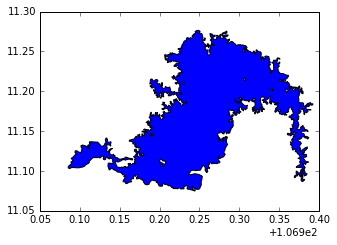

In [10]:
from matplotlib import pyplot as plt
vn_reservoirs_path = 'vnreservoirs/VN_Reservoirs.shp'
df = gpd.read_file(vn_reservoirs_path)
plt.rcParams['figure.figsize'] = 5, 5
ho_tri_an = df[df.AREA_SKM == 277.4]
ho_tri_an.plot()

In [11]:
from rasterio.crs import CRS
from rasterio.warp import transform_geom
import rasterio.mask

from shapely.geometry import shape, mapping, Polygon, MultiPolygon
from descartes import PolygonPatch

ImportError: cannot import name 'CRSError'

In [ ]:
raw_file = NDVI
trans = raw_file.transform

ho_tri_an_shape = ho_tri_an.geometry.values[0]
ho_tri_an_geom = mapping(ho_tri_an_shape)
ho_tri_an_shape = [transform_geom(df.crs, raw_file.crs,ho_tri_an_geom)]

In [ ]:
inf = float("inf")
x0, y0, x1, y1 = [inf, -inf, -inf, inf] #top-left, bottom-right
for x, y in ho_tri_an_shape[0]['coordinates'][0]:
    if x0 > x:
        x0 = x
    if x1 < x:
        x1 = x
    if y0 < y:
        y0 = y
    if y1 > y:
        y1 = y
new_coordinates = [{'type': 'Polygon', 'coordinates': [[(x0-1000, y0+1000),(x1+1000, y0+1000), 
                                                        (x1+1000, y1-1000), (x0-1000, y1-1000)]]}]
ndwi, _ = rasterio.mask.mask(NDWI, new_coordinates, crop=True)
ndwi2, _ = rasterio.mask.mask(NDWI2, new_coordinates, crop=True)

In [ ]:
ndwi2 = ndwi2.squeeze()
pyplot.imshow(ndwi2)

In [ ]:
def insideMatrix(x, y, m, n):
    if x < 0 or x >= m or y < 0 or y >= n:
        return False
    return True

In [ ]:
def check_expansion(val, type_of_map):
    if (type_of_map == 'NDVI'):
        if (val < 0):
            return True;
        return False;
    if (type_of_map == 'NDWI'):
        if (val > 0):
            return True;
        return False;
    if (type_of_map == 'NDWI2'):
        if (val > 0):
            return True;
        return False;  
    return null;

In [ ]:
def count_pixel(obj, type_of_map, startingPoint):
    from queue import Queue
    dx = [0,1,0,-1]
    dy = [1,0,-1,0]

    visited = np.zeros((obj.shape[0], obj.shape[1])).astype('bool')
    final_obj= np.zeros((obj.shape[0], obj.shape[1]))

    u0, v0 = startingPoint[0], startingPoint[1]

    q = Queue()
    q.put((u0, v0))
    visited[u0, v0] = True
    countPixel = 0

    while not q.empty():
        u, v = q.get()
        final_obj[u, v] = -1
        countPixel += 1
        for k in range(4):
            _u, _v = u + dx[k], v + dy[k]
            if not insideMatrix(_u, _v, obj.shape[0], obj.shape[1]): 
                continue
            if visited[_u, _v]:
                continue
            if check_expansion(obj[_u, _v], type_of_map):
                visited[_u, _v] = True
                q.put((_u, _v))
    pyplot.imshow(final_obj)
    return countPixel

In [ ]:
count_pixel(ndwi2, 'NDWI2', [500, 600]) * 900 / 1000000